<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**

##CS6462 - PROBABILISTIC AND EXPLAINABLE AI 
##SEM2 2021/2

###CS6462_Lab_4.7

###Instructor: Enrique Naredo

Copyright (C) 2022 - All rights reserved, do not copy or distribute without permission of the author.

## [Classification](https://en.wikipedia.org/wiki/Statistical_classification)

In statistics, classification is the problem of identifying which of a set of categories (sub-populations) an observation (or observations) belongs to. 

Classification examples:
* assigning a given email to the "spam" or "non-spam" class, 
* assigning a diagnosis to a given patient (sex, blood pressure, presence or absence of certain symptoms, etc.)

An algorithm that implements classification, especially in a concrete implementation, is known as a classifier. 

* The term "classifier" sometimes also refers to the mathematical function, 
* implemented by a classification algorithm, that maps input data to a category. 

### Example-7

**Real-world dataset**

In [ ]:
#import libraries
import pymc3 as pm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az
import warnings
warnings.filterwarnings('ignore')

[Iris Data Set](https://archive.ics.uci.edu/ml/datasets/iris)

**Data Set Information:**

* The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. 
* One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

* Predicted attribute: class of iris plant.

**Attribute Information:**

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
  * Iris Setosa
  * Iris Versicolour
  * Iris Virginica

In [ ]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# show the dictionary keys
iris.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# class labels
print(np.unique(iris['species']))

['setosa' 'versicolor' 'virginica']


In [ ]:
# number of samples
iris.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [ ]:
# data statistics
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


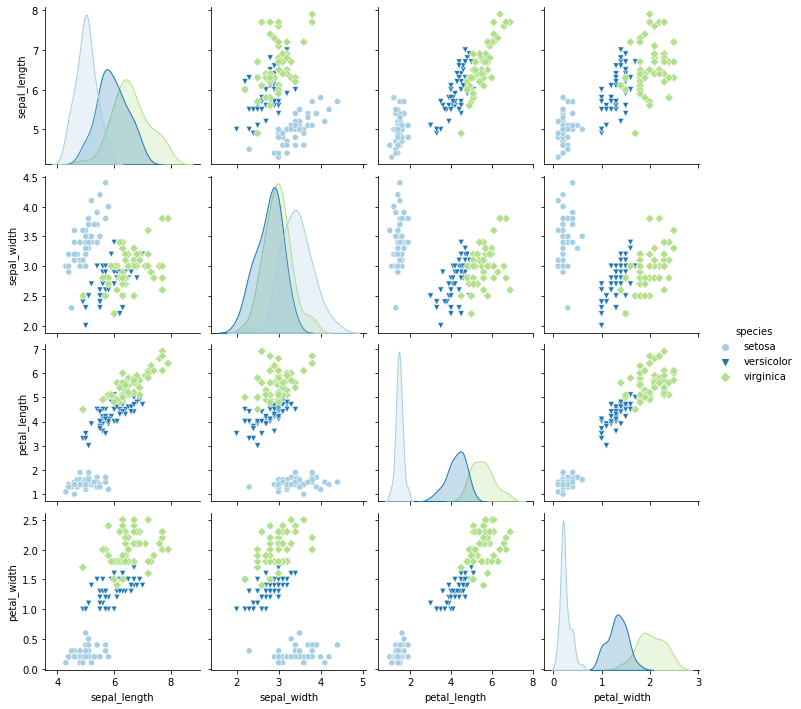

In [ ]:
## Grid of Axes shared across the y-axes across a single row and the x-axes across a single column. 
# The diagonal plots a univariate distribution to show the marginal distribution of the data in each column.
# palette = "tab10", "hls", "husl", "Set2", "Paired"
# markers = "o", "v", "^", "<", ">", "p", "P", "*", "s", "D"
g = sns.pairplot(iris, hue="species", palette="Paired", markers=["o", "v", "D"])

In [ ]:
## build the model

# formula-> class_labels ~ sum of features
iris_formula = 'species ~ sepal_length + sepal_width + petal_length + petal_width'

with pm.Model() as model:
    pm.glm.GLM.from_formula(formula = iris_formula, 
                            data = iris, 
                            family = pm.glm.families.Binomial())
    # try first a lower value (100), then a higher (1000)
    trace = pm.sample(100) # 1000
    

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [petal_width, petal_length, sepal_width, sepal_length, Intercept]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 48 seconds.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
There were 18 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.2 for some parameters.
The number of effective samples is smaller than 10% for some parameters.


In [ ]:
# show the trace var names
trace.varnames

['Intercept', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


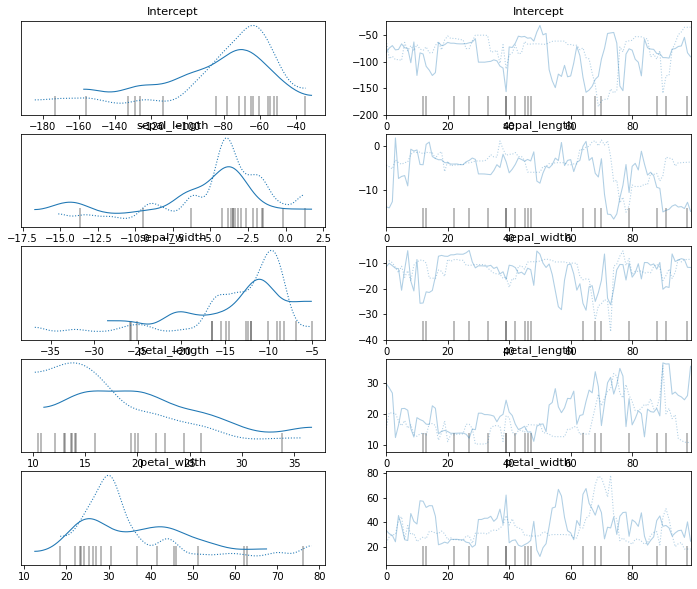

In [ ]:
# plot traces
from pymc3 import traceplot
traceplot(trace);

Got error No model on context stack. trying to find log_likelihood in translation.


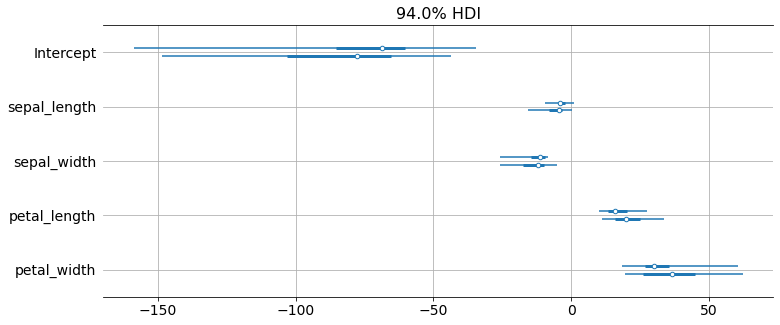

In [ ]:
# Generates a “forest plot” of 100*(1-alpha)% 
# credible intervals for either the set of variables 
# in a given model, or a specified set of nodes.
pm.plots.forestplot(trace, figsize=(12, 5))

# add a grid to the plot
plt.grid()  

<Figure size 648x504 with 0 Axes>

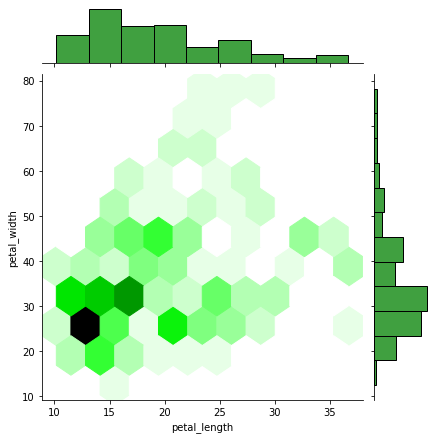

<Figure size 648x504 with 0 Axes>

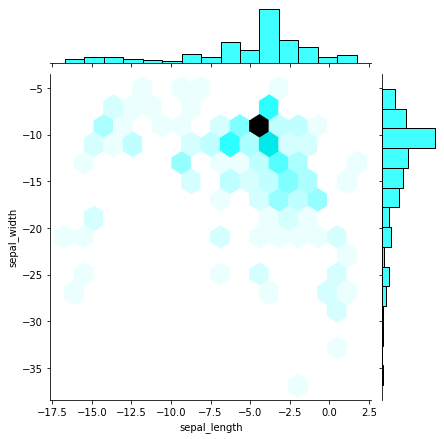

In [ ]:
## Draw a plot of two variables with bivariate and univariate graphs.

plt.figure(figsize=(9,7))

sns.jointplot(trace['petal_length'], 
              trace['petal_width'], 
              kind="hex", color="green")

plt.xlabel("petal_length")
plt.ylabel("petal_width");
plt.show()

plt.figure(figsize=(9,7))

sns.jointplot(trace['sepal_length'], 
              trace['sepal_width'], 
              kind="hex", color="cyan")

plt.xlabel("sepal_length")
plt.ylabel("sepal_width");
plt.show();

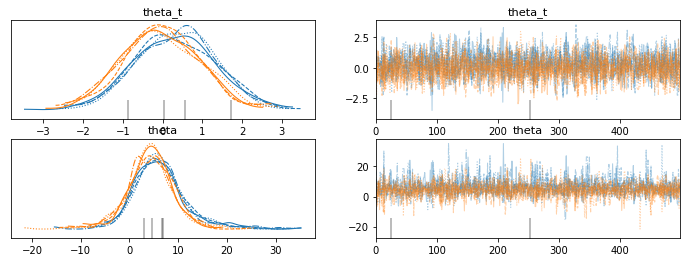

In [ ]:
# hierarchical model of the the Eight Schools dataset (Rubin 1981)
data8schools = az.load_arviz_data('non_centered_eight')

# Coordinates of var_names to be plotted
coords = {'school': ['Choate', 'Lawrenceville']}

# Plot distribution (histogram or kernel density estimates) and sampled values or rank plot
az.plot_trace(data8schools, var_names=('theta'), filter_vars="like", coords=coords);

Got error No model on context stack. trying to find log_likelihood in translation.


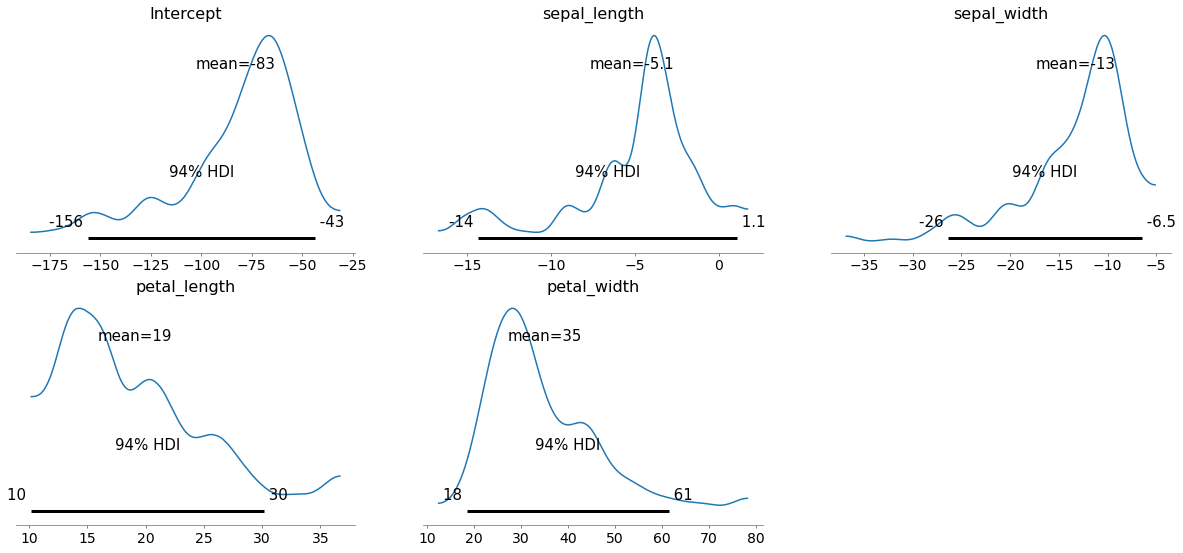

In [ ]:
# Plot Posterior densities in the style of John K. Kruschke’s book
pm.plots.plot_posterior(trace);

In [ ]:
pm.plots.forestplot(trace)


Got error No model on context stack. trying to find log_likelihood in translation.


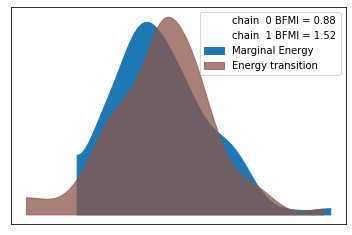

In [ ]:
# plot samples histograms and values
pm.plots.energyplot(trace);

Got error No model on context stack. trying to find log_likelihood in translation.


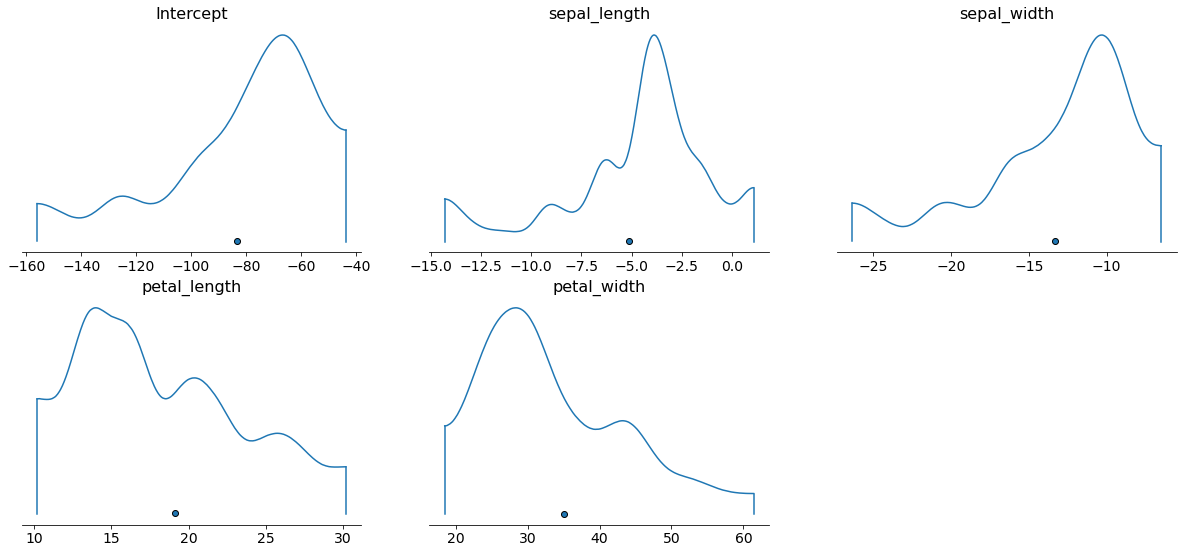

In [ ]:
# This plot is somehow similar to a forestplot
# but we get truncated KDE plots (by default 95% credible intervals) 
# grouped by variable names together with a point estimate (by default the mean)
pm.plots.densityplot(trace);

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f525ae0f390>,
      dtype=object)

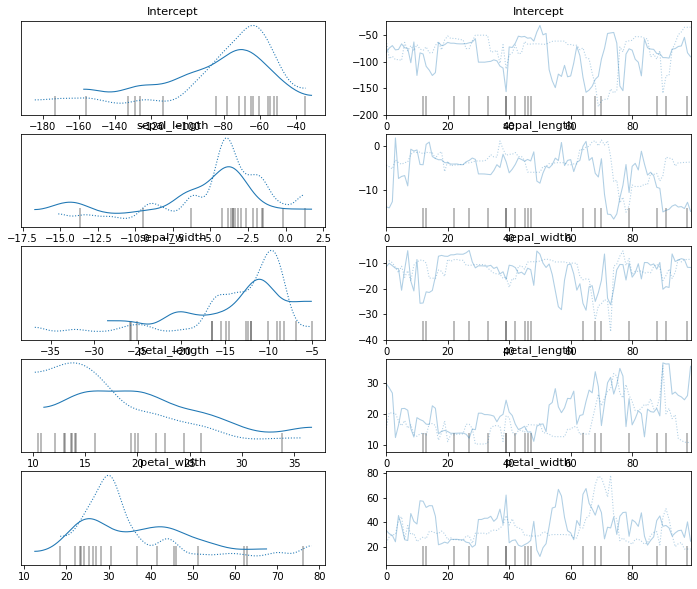

In [ ]:
from pymc3 import traceplot
traceplot(trace)